# Decision Tree Classifiers

**Author:** Sima Adleyba  
**Date:** October 2025

**Email**: adleyba@sabanciuniv.edu

In [ ]:
# Make sure you have these libraries
# !pip install matplotlib
# !pip install tensorflow
# !pip install scikit-learn

## Information About Decision Tree Classifiers



*   A supervised learning algorithm that uses a tree-like structure consisting of a root node, internal nodes, branches, and leaf nodes.
*   Each internal node represents a test on a feature, each branch a decision outcome, and each leaf a predicted label or value.
*   Can be used for both classification and regression tasks.
*   It is prone to overfitting.



## Data Loading

#### Two Moons Dataset
- Contains 400 synthetic samples forming two interleaving half-moon shapes.
- Each sample has 2 features: the x and y coordinates in a 2D plane.

In [1]:
import time
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

In [2]:
X, y = make_moons(n_samples=400, noise=0.35, random_state=1231)

Check the data

In [3]:
print(y)

[1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 0 0 1 0 1 1 0 0 1 1 0 1 0 0 1 1 0 0
 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1 1 0 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0 0 0
 0 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 0 1 1 1 1 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0
 0 0 0 1 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 1 0 1 1 0 0 1 0 1 1 0 0 0 1 1 0 1 1
 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1 0 0 1 0 1 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 0
 0 0 1 0 1 0 0 1 1 0 1 1 0 0 1 1 1 1 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0
 0 0 1 0 1 0 1 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0 1 0 0 1 1 0 1 1
 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 1 1 1 1 0 0 1 0 1 0 0 0 0 0 1 1 1 1
 1 0 0 1 1 1 1 1 1 0 1 0 0 1 1 0 0 1 0 1 1 1 1 0 0 1 1 0 1 1 0 1 1 0 0 0 0
 0 0 0 0 1 0 0 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 0
 1 1 0 0 0 1 0 1 0 1 1 1 0 1 1 1 0 1 0 1 1 0 0 0 0 1 1 0 1 0]


In [4]:
print("X shape: ", X.shape)
print("y shape: ", y.shape)

X shape:  (400, 2)
y shape:  (400,)


Visualize the data

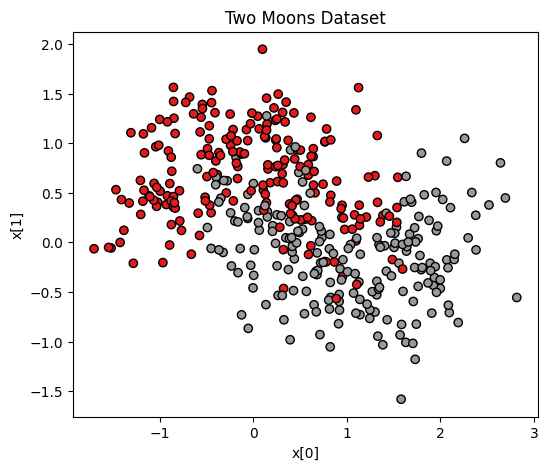

In [5]:
plt.figure(figsize=(6,5))
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Set1, edgecolor='k')
plt.title("Two Moons Dataset")
plt.xlabel("x[0]")
plt.ylabel("x[1]")
plt.show()

## Train - Val - Test Split

We will split the dataset into training, validation, and test sets with proportions of 70%, 15%, and 15%, respectively.


In [6]:
from sklearn.model_selection import train_test_split

# first split: Train (70%) vs Temp (30%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1231)

# second split: Val (15%) vs Test (15%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=1231)

In [7]:
print("Training data shape")
print("Features:", X_train.shape, "Labels", y_train.shape)
print("\nValidation data shape")
print("Features:", X_val.shape, "Labels", y_val.shape)
print("\nTest data shape")
print("Features:", X_test.shape, "Labels", y_test.shape)

Training data shape
Features: (280, 2) Labels (280,)

Validation data shape
Features: (60, 2) Labels (60,)

Test data shape
Features: (60, 2) Labels (60,)


Check class distribution

In [8]:
import numpy as np

unique, counts = np.unique(y_train, return_counts=True)

print(f"Class 0 samples: {counts[0]}")
print(f"Class 1 samples: {counts[1]}")

Class 0 samples: 140
Class 1 samples: 140


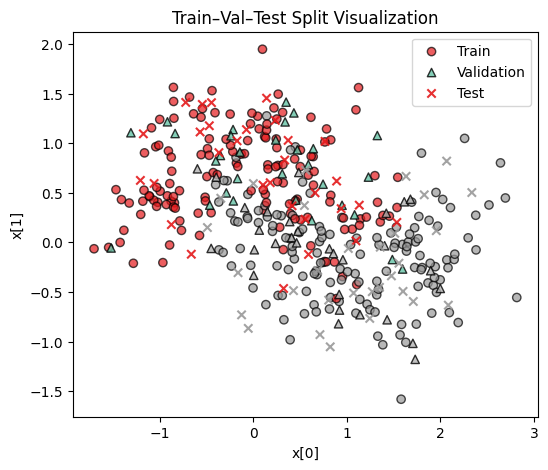

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))

plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap=plt.cm.Set1,
            label="Train", edgecolor='k', alpha=0.7)

plt.scatter(X_val[:,0], X_val[:,1], c=y_val, cmap=plt.cm.Set2,
            marker='^', label="Validation", edgecolor='k', alpha=0.8)

plt.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap=plt.cm.Set1,
            marker='x', label="Test", alpha=0.9)

plt.title("Train–Val–Test Split Visualization")
plt.xlabel("x[0]")
plt.ylabel("x[1]")
plt.legend()
plt.show()

## Hyperparameter Optimization
Using the validation set, we will try to find the best hyperparameters

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# hyperparameter search space
max_depth_values = [1, 2, 3, 4, 5, 10, 20]
min_samples_split_values = [2, 3, 4]

best_params = None
best_accuracy = 0

# iterate over combinations of hyperparameters
for depth in max_depth_values:
    for split in min_samples_split_values:

        # train classifier
        dt = DecisionTreeClassifier(max_depth=depth,
                                    min_samples_split=split,
                                    random_state=1231)
        dt.fit(X_train, y_train)

        # evaluate on validation set
        y_val_pred = dt.predict(X_val)
        val_accuracy = accuracy_score(y_val, y_val_pred)

        print(f"max_depth={depth}, min_samples_split={split} -> Validation Accuracy: {val_accuracy:.4f}")

        # track best model
        if val_accuracy > best_accuracy:
            best_accuracy = val_accuracy
            best_params = {'max_depth': depth, 'min_samples_split': split}

print(f"\nBest Hyperparameters: {best_params}, Best Validation Accuracy: {best_accuracy:.4f}")

max_depth=1, min_samples_split=2 -> Validation Accuracy: 0.7833
max_depth=1, min_samples_split=3 -> Validation Accuracy: 0.7833
max_depth=1, min_samples_split=4 -> Validation Accuracy: 0.7833
max_depth=2, min_samples_split=2 -> Validation Accuracy: 0.8167
max_depth=2, min_samples_split=3 -> Validation Accuracy: 0.8167
max_depth=2, min_samples_split=4 -> Validation Accuracy: 0.8167
max_depth=3, min_samples_split=2 -> Validation Accuracy: 0.8167
max_depth=3, min_samples_split=3 -> Validation Accuracy: 0.8167
max_depth=3, min_samples_split=4 -> Validation Accuracy: 0.8167
max_depth=4, min_samples_split=2 -> Validation Accuracy: 0.7500
max_depth=4, min_samples_split=3 -> Validation Accuracy: 0.7500
max_depth=4, min_samples_split=4 -> Validation Accuracy: 0.7500
max_depth=5, min_samples_split=2 -> Validation Accuracy: 0.8000
max_depth=5, min_samples_split=3 -> Validation Accuracy: 0.8000
max_depth=5, min_samples_split=4 -> Validation Accuracy: 0.8000
max_depth=10, min_samples_split=2 -> Val

## Evaluation

Train the final model

In [11]:
# train final model with best hyperparameters

# concatenate train and validation data
X_train_val = np.vstack([X_train, X_val])
y_train_val = np.hstack([y_train, y_val])

best_tree = DecisionTreeClassifier(max_depth=best_params['max_depth'],
                                   min_samples_split=best_params['min_samples_split'],
                                   random_state=1231)
best_tree.fit(X_train_val, y_train_val)

DecisionTreeClassifier(max_depth=2, random_state=1231)

Compute the accuracy and plot the confusion matrix

Test Accuracy: 0.8667
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.87      0.87      0.87        30
     Class 1       0.87      0.87      0.87        30

    accuracy                           0.87        60
   macro avg       0.87      0.87      0.87        60
weighted avg       0.87      0.87      0.87        60

Confusion matrix:


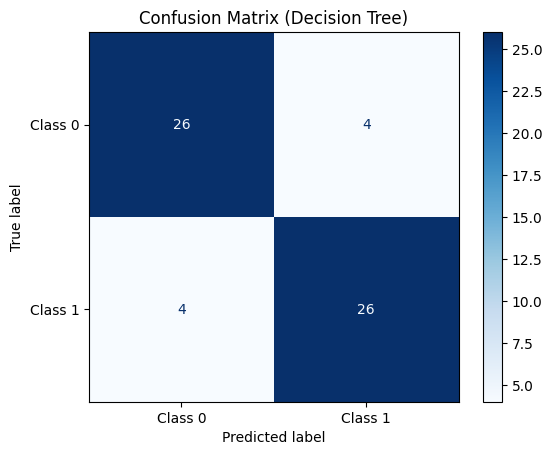

In [12]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

y_test_pred = best_tree.predict(X_test)

print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_test_pred, target_names=["Class 0", "Class 1"]))

print("Confusion matrix:")

# compute matrix
cm = confusion_matrix(y_test, y_test_pred)

# define class labels
class_names = ["Class 0", "Class 1"]

# plot with labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix (Decision Tree)")
plt.show()

## Visualization

Visualize the decision tree

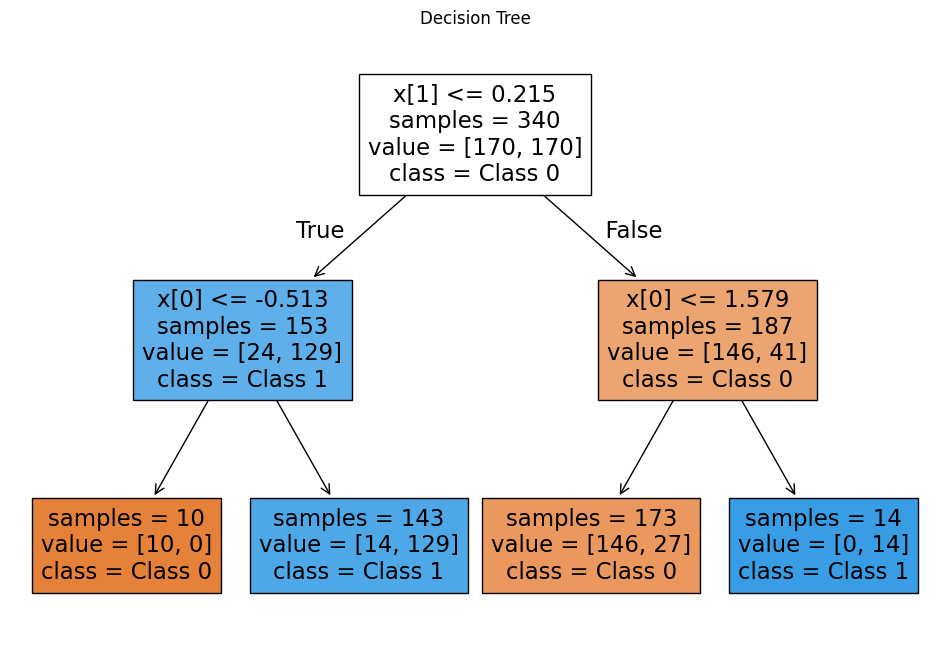

In [13]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plot_tree(best_tree, filled=True, class_names=class_names,impurity=False)
plt.title("Decision Tree")
plt.show()

Visualize the decision boundaries

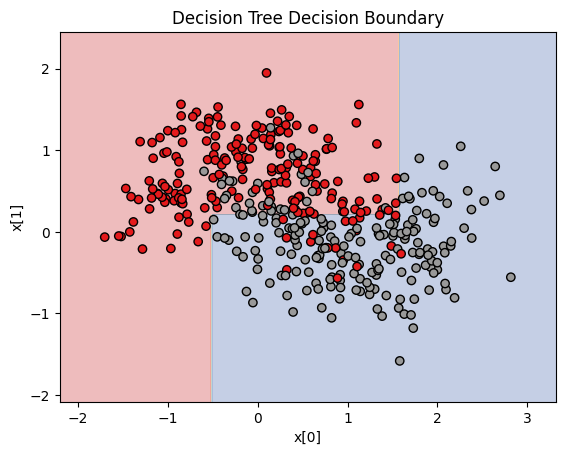

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# create a grid over feature space
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

# predict class for each grid point
Z = best_tree.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# plot decision regions and data
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k')
plt.title("Decision Tree Decision Boundary")
plt.xlabel("x[0]")
plt.ylabel("x[1]")
plt.show()